In [1142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import sklearn.metrics

# Further Cleaning

In [1460]:
df = pd.read_pickle('better_model_data.pkl')
df = df.reset_index().drop(columns='index')
df.head()

,Country,Country Code,Year,GDP per Capita (PPP),Budget Surplus or Deficit (%GDP),Central Govt Debt %GDP,Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),SPI Year,Social Progress Index
0,Angola,AGO,2013,7682.477158,0.9,NaN,32.029882,8.777814,14.184763,37.049564,3.42132,0.032290,4.455239,36.800,60.2500,1.5875,2014,38.51
1,Botswana,BWA,2013,14707.701699,-7.9,18.21243,36.664808,5.884607,25.609893,33.341854,9.63292,0.537280,2.056396,99.625,0.0000,0.5625,2014,62.99
2,Burkina Faso,BFA,2013,1683.107411,4.8,NaN,16.917850,0.533739,14.948642,28.408018,4.59384,0.509164,1.392049,81.725,9.5625,8.7375,2014,42.94
3,Burundi,BDI,2013,740.984231,-1.5,NaN,3.933888,7.937958,NaN,33.161716,5.99536,0.210280,2.367638,13.800,77.0500,10.4000,2014,38.10
4,Chad,TCD,2013,1569.059772,3.0,NaN,NaN,0.222672,NaN,22.804913,2.85071,0.300500,5.592313,98.500,0.0000,1.8750,2014,27.49


In [1461]:
df.isnull().sum().sort_values(ascending=False)

Central Govt Debt %GDP                              372
Tax Revenue %GDP                                     78
Gross Savings %GDP                                   18
Inflation Rate on Consumer Prices (Annual %)         12
Military Expenditure %GDP                            12
GDP per Capita (PPP)                                  6
Country Code                                          0
Year                                                  0
Budget Surplus or Deficit (%GDP)                      0
Social Progress Index                                 0
SPI Year                                              0
Health Expenditure (%GDP)                             0
Education Expenditure (%GDP)                          0
Science, Tech, Innovation R&D Expenditure (%GDP)      0
Fossil Fuel (%)                                       0
Hydroelectric Plants (%)                              0
Renewable Energy Sources (%)                          0
Country                                         

In [1297]:
#too many nas in this column, will drop
df.drop(columns = ['Central Govt Debt %GDP'], axis = 1, inplace = True)
df.drop(labels=df[df.Country == 'Qatar'].index, axis = 0, inplace = True)
df.drop(labels=df[df.Country == 'Cuba'].index, axis = 0, inplace = True)
df.drop(labels=df[df.Country == 'Papua New Guinea'].index, axis = 0, inplace = True)
df.drop(labels=df[df.Country == 'Chad'].index, axis = 0, inplace = True)
df.drop(labels=df[df.Country == 'Eswatini'].index, axis = 0, inplace = True)
df.drop(labels=df[df.Country == 'Uzbekistan'].index, axis = 0, inplace = True)

In [1298]:
#Iceland had no military/armed forces
df.loc[df.Country =='Iceland', 'Military Expenditure %GDP'] = 0
df.loc[df.Country =='China', 'Education Expenditure (%GDP)'] = 4.11

In [1299]:
uzbek = pd.read_csv('Uzbekistan_inflation_rate.csv')
uzbek['Change,\xa0%'] = uzbek['Change,\xa0%'].str.strip('% ').astype(float)
df.loc[df[df.Country=='Uzbekistan'].index, 'Inflation Rate on Consumer Prices (Annual %)'] = np.array(uzbek['Change,\xa0%'][1:7].tolist().reverse())

In [1300]:
more_tax_rev = pd.read_csv('WEO_Data.csv')
df.loc[df[df.Country=='Burundi'].index, 'Tax Revenue %GDP'] = np.array(more_tax_rev[more_tax_rev.Country=='Burundi'][['2013', '2014', '2015', '2016', '2017', '2018']])[0]
df.loc[df[df.Country=='Tunisia'].index, 'Tax Revenue %GDP'] = np.array(more_tax_rev[more_tax_rev.Country=='Tunisia'][['2013', '2014', '2015', '2016', '2017', '2018']])[0]
df.loc[df[df.Country=='Serbia'].index, 'Tax Revenue %GDP'] = np.array(more_tax_rev[more_tax_rev.Country=='Serbia'][['2013', '2014', '2015', '2016', '2017', '2018']])[0]
df.loc[df[df.Country=='Tajikistan'].index, 'Tax Revenue %GDP'] = np.array(more_tax_rev[more_tax_rev.Country=='Tajikistan'][['2013', '2014', '2015', '2016', '2017', '2018']])[0]
df.loc[df[df.Country=='Mauritania'].index, 'Tax Revenue %GDP'] = np.array(more_tax_rev[more_tax_rev.Country=='Mauritania'][['2013', '2014', '2015', '2016', '2017', '2018']])[0]
df.loc[df[df.Country=='Pakistan'].index, 'Tax Revenue %GDP'] = np.array(more_tax_rev[more_tax_rev.Country=='Pakistan'][['2013', '2014', '2015', '2016', '2017', '2018']])[0]
df.loc[df[df.Country=='Ecuador'].index, 'Tax Revenue %GDP'] = np.array(more_tax_rev[more_tax_rev.Country=='Ecuador'][['2013', '2014', '2015', '2016', '2017', '2018']])[0]
df.loc[df[df.Country=='Panama'].index, 'Tax Revenue %GDP'] = np.array(more_tax_rev[more_tax_rev.Country=='Panama'][['2013', '2014', '2015', '2016', '2017', '2018']])[0]
df.loc[df[df.Country=='Oman'].index, 'Tax Revenue %GDP'] = np.array(more_tax_rev[more_tax_rev.Country=='Oman'][['2013', '2014', '2015', '2016', '2017', '2018']])[0]



In [1301]:
df['Inflation Rate on Consumer Prices (Annual %)'] = pd.to_numeric(df['Inflation Rate on Consumer Prices (Annual %)'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 557
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country                                           522 non-null    object 
 1   Country Code                                      522 non-null    object 
 2   Year                                              522 non-null    int64  
 3   GDP per Capita (PPP)                              522 non-null    float64
 4   Budget Surplus or Deficit (%GDP)                  522 non-null    float64
 5   Gross Savings %GDP                                522 non-null    float64
 6   Inflation Rate on Consumer Prices (Annual %)      522 non-null    float64
 7   Tax Revenue %GDP                                  522 non-null    float64
 8   Health Expenditure (%GDP)                         522 non-null    float64
 9   Education Expenditure

In [1302]:
pd.to_pickle(df, 'final_data.pkl')

# Shallow EDA

In [1462]:
df = pd.read_pickle('final_data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 557
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country                                           522 non-null    object 
 1   Country Code                                      522 non-null    object 
 2   Year                                              522 non-null    int64  
 3   GDP per Capita (PPP)                              522 non-null    float64
 4   Budget Surplus or Deficit (%GDP)                  522 non-null    float64
 5   Gross Savings %GDP                                522 non-null    float64
 6   Inflation Rate on Consumer Prices (Annual %)      522 non-null    float64
 7   Tax Revenue %GDP                                  522 non-null    float64
 8   Health Expenditure (%GDP)                         522 non-null    float64
 9   Education Expenditure

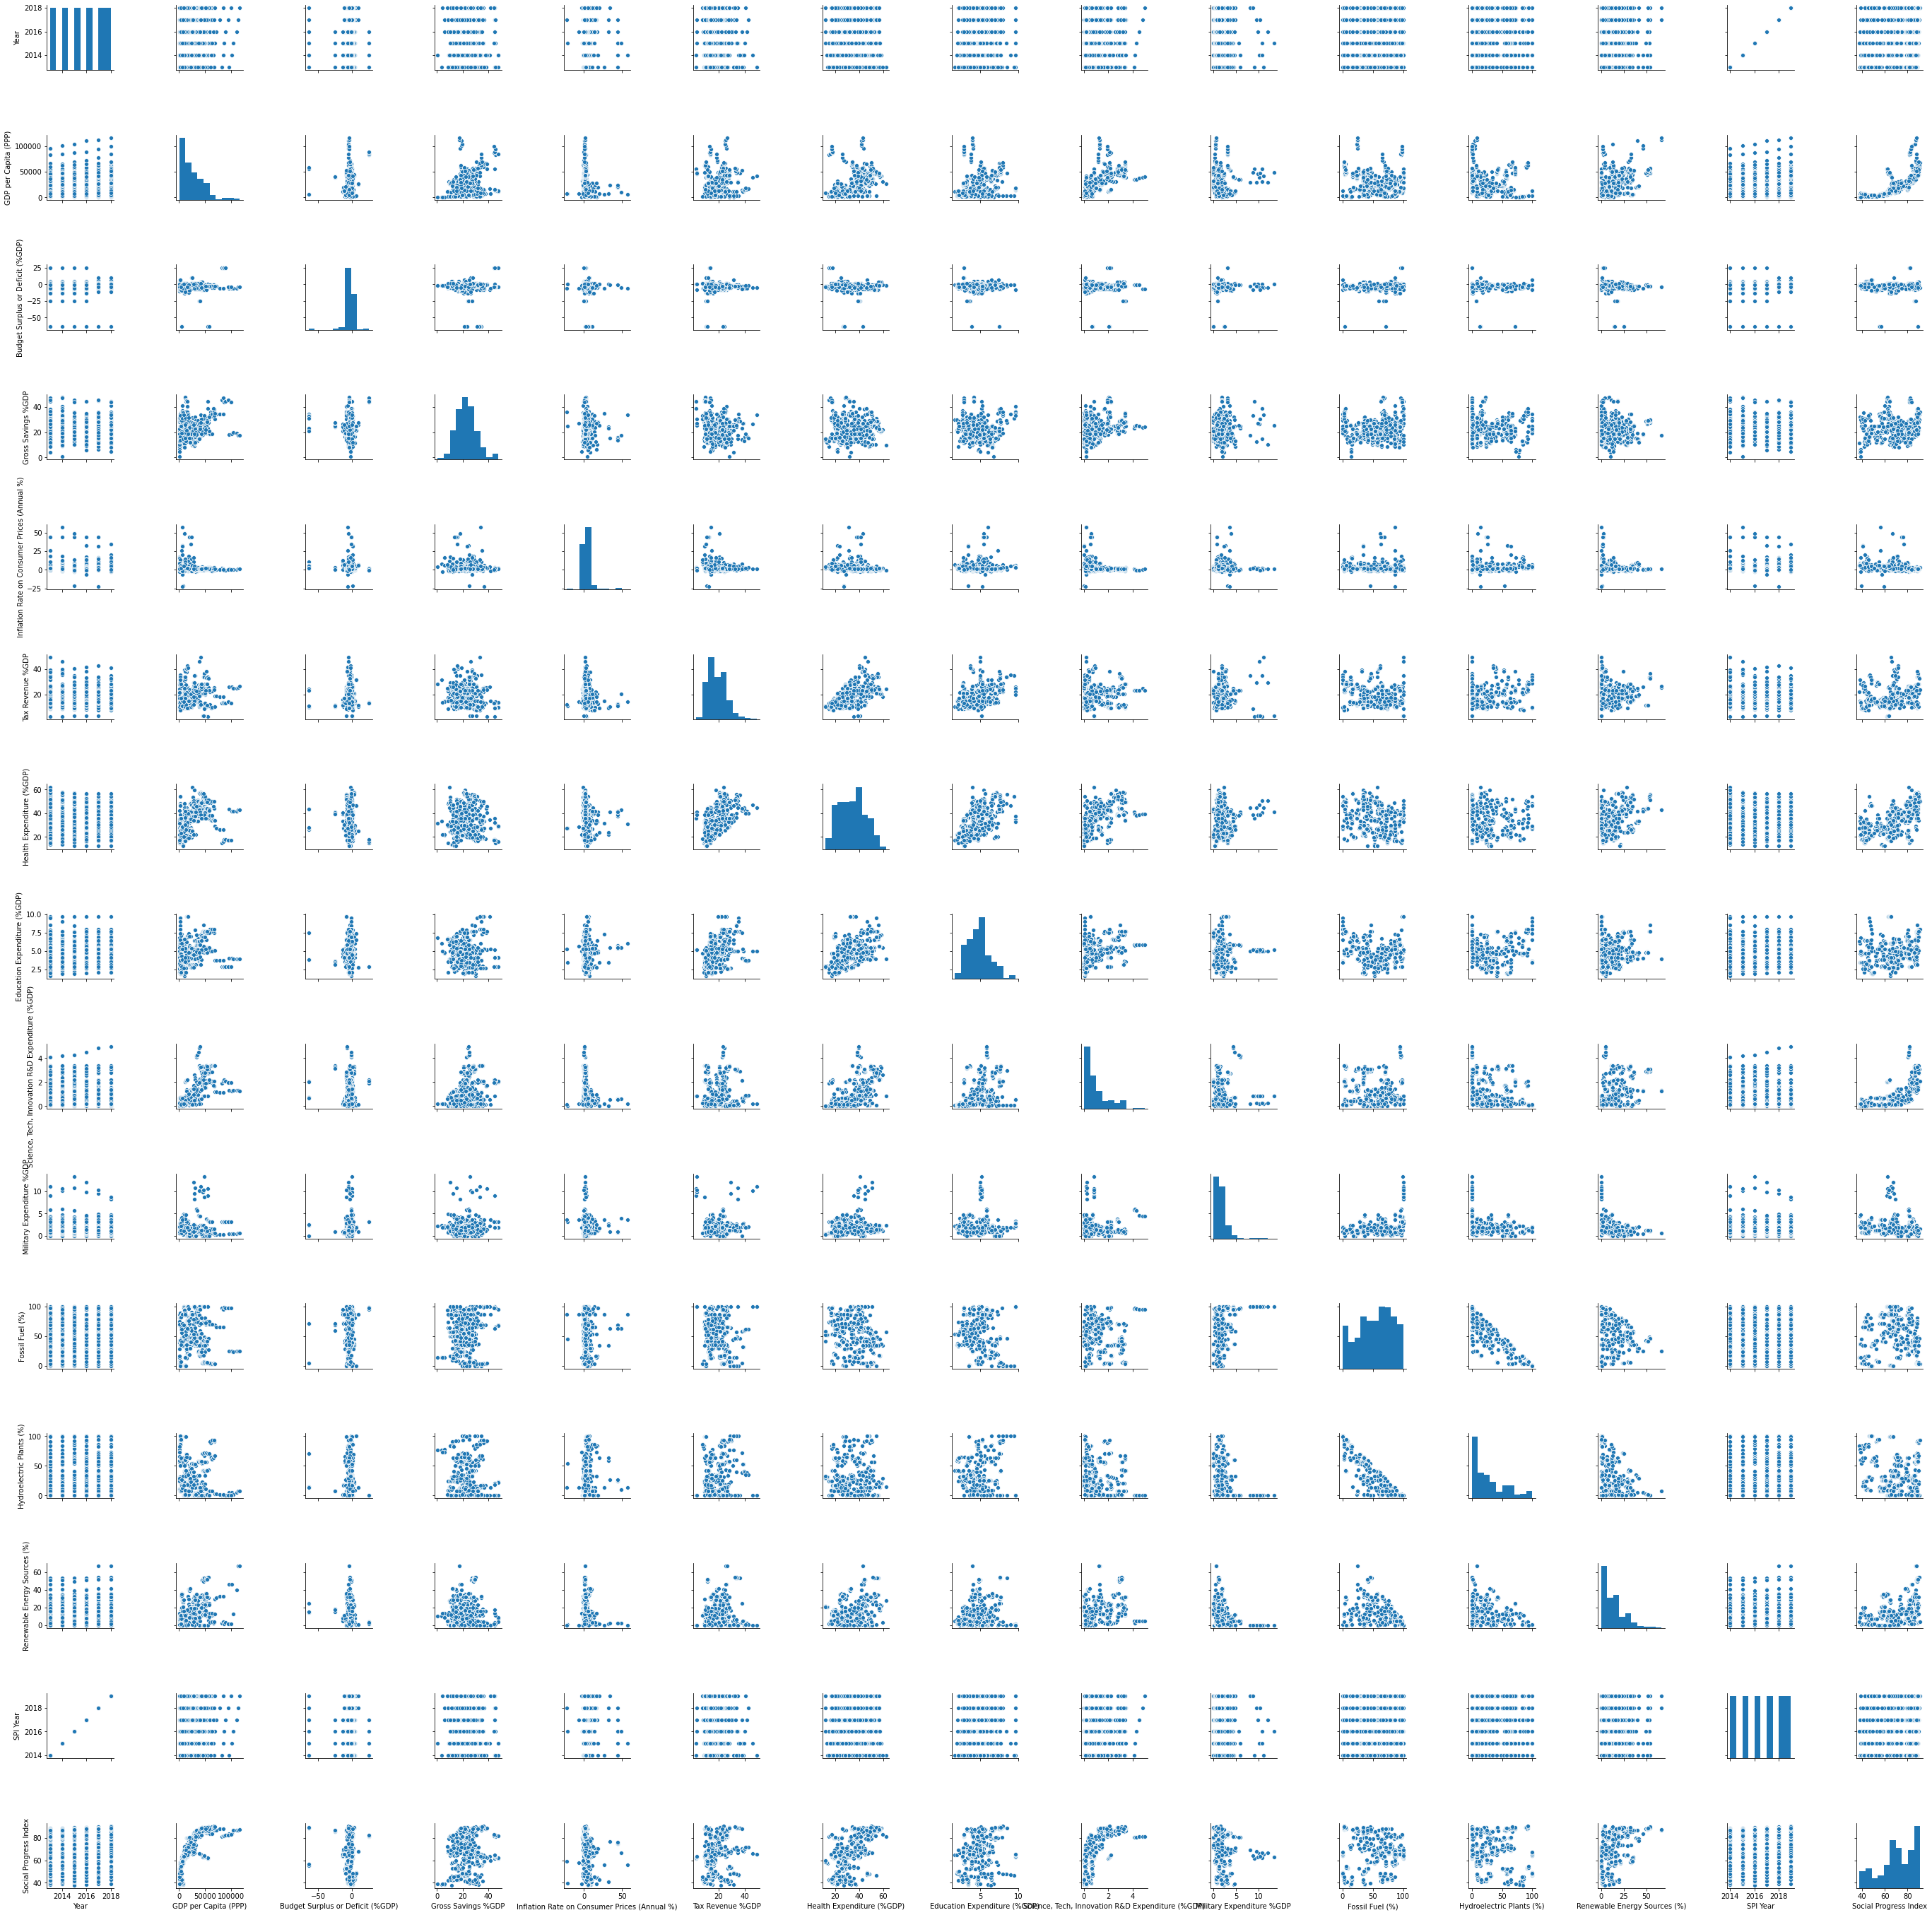

In [1139]:
sns.pairplot(df)

## GDP per Capita (PPP) Distribution

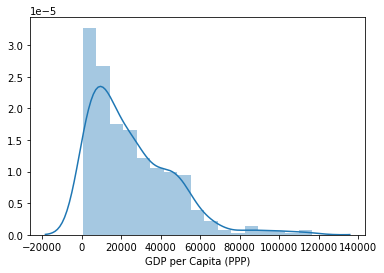

In [1150]:
sns.distplot(df['GDP per Capita (PPP)'])

## Social Progress Index Distribution

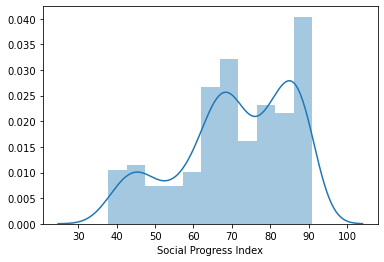

In [1152]:
sns.distplot(df['Social Progress Index'])

# Initial baseline Model

## Train / Validation / Test Splits

In [1778]:
df.head()

,Country,Country Code,Year,GDP per Capita (PPP),Budget Surplus or Deficit (%GDP),Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),SPI Year,Social Progress Index
0,Angola,AGO,2013,7682.477158,0.9,32.029882,8.777814,14.184763,37.049564,3.42132,0.032290,4.455239,36.800,60.2500,1.5875,2014,38.51
1,Botswana,BWA,2013,14707.701699,-7.9,36.664808,5.884607,25.609893,33.341854,9.63292,0.537280,2.056396,99.625,0.0000,0.5625,2014,62.99
2,Burkina Faso,BFA,2013,1683.107411,4.8,16.917850,0.533739,14.948642,28.408018,4.59384,0.509164,1.392049,81.725,9.5625,8.7375,2014,42.94
3,Burundi,BDI,2013,740.984231,-1.5,3.933888,7.937958,31.351000,33.161716,5.99536,0.210280,2.367638,13.800,77.0500,10.4000,2014,38.10
6,Ethiopia,ETH,2013,1283.570926,-6.0,28.334779,7.464022,8.764725,17.755827,4.49855,0.604740,0.806417,4.125,83.5625,11.9000,2014,39.31


In [1779]:
df_prep = df.copy()

In [1780]:
test_holdout = df_prep[df_prep['Year'] == 2018]
X_test, y_test = test_holdout.drop(columns = ['Country', 'Country Code', 'Year', 'SPI Year', 'Social Progress Index'], axis = 1), df_prep['Social Progress Index']
X_test.shape

(87, 12)

In [1781]:
modeling_set = df_prep[df_prep['Year'] != 2018]
X, y = modeling_set.drop(columns = ['Country', 'Country Code', 'Year', 'SPI Year', 'Social Progress Index'], axis = 1), modeling_set['Social Progress Index']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X.shape

(435, 12)

## Dummy Model

In [1681]:
dummy_model = DummyRegressor(strategy='mean')
dummy_fit = dummy_model.fit(X_train, y_train)
print(f'Dummy Model train R^2: {dummy_fit.score(X_train, y_train):.3f}')
print(f'Dummy Model val R^2: {dummy_fit.score(X_val, y_val):.3f}')

Dummy Model train R^2: 0.000
Dummy Model val R^2: -0.035


# Simple Linear Regresssions

In [1682]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [1683]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression train R^2: 0.734
Linear Regression val R^2: 0.679
Ridge Regression train R^2: 0.734
Ridge Regression val R^2: 0.679
Degree 2 polynomial regression train R^2: 0.943
Degree 2 polynomial regression val R^2: 0.761


# Trial 2

In [1684]:
test_holdout = df_prep[df_prep['Year'] == 2018]
X_test_p, y_test_p = test_holdout.drop(columns = ['Country', 'Country Code', 'Year', 'SPI Year', 'Social Progress Index'], axis = 1), df['Social Progress Index']

In [1685]:
modeling_set = df_prep[df_prep['Year'] != 2018]
X, y = modeling_set.drop(columns = ['Country', 'Country Code', 'Year', 'SPI Year', 'Social Progress Index'], axis = 1), modeling_set['Social Progress Index']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [1686]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1000)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [1687]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression train R^2: 0.716
Linear Regression val R^2: 0.776
Ridge Regression train R^2: 0.493
Ridge Regression val R^2: 0.499
Degree 2 polynomial regression train R^2: 0.939
Degree 2 polynomial regression val R^2: 0.893


# STATSMODELS

## SMF OLS Linear Model

In [1688]:
# processedrocessing df column names for patsy
df_processed = df.copy().dropna(axis = 0)
df_processed.rename(columns=lambda name: name.replace(",", ""), inplace=True)
df_processed.rename(columns=lambda name: name.replace(" ", "_"), inplace=True)
df_processed.rename(columns=lambda name: name.replace('(', '').replace('%', '').replace(')', ''), inplace=True)
df_processed.rename(columns=lambda name: name.replace("&", ""), inplace=True)

In [1689]:
test_holdout = df_processed[df_processed['Year'] == 2018]
X_test_p, y_test_p = test_holdout.drop(columns = ['Country', 'Country_Code', 'Year', 'SPI_Year', 'Social_Progress_Index'], axis = 1), df_processed['Social_Progress_Index']

In [1690]:
modeling_set_processed = df_processed[df_processed['Year'] != 2018]
X_p, y_p = modeling_set_processed.drop(columns = ['Country', 'Country_Code', 'Year', 'SPI_Year', 'Social_Progress_Index'], axis = 1), modeling_set_processed['Social_Progress_Index']
X_train_p, X_val_p, y_train_p, y_val_p = train_test_split(X_p, y_p, test_size=0.2)

In [1691]:
x_terms = ' + '.join([col_name.replace('(', '').replace('%', '').replace(')', '') for col_name in X_train_p.columns.tolist()])
y_term = 'Social_Progress_Index'
x_terms

'GDP_per_Capita_PPP + Budget_Surplus_or_Deficit_GDP + Gross_Savings_GDP + Inflation_Rate_on_Consumer_Prices_Annual_ + Tax_Revenue_GDP + Health_Expenditure_GDP + Education_Expenditure_GDP + Science_Tech_Innovation_RD_Expenditure_GDP + Military_Expenditure_GDP + Fossil_Fuel_ + Hydroelectric_Plants_ + Renewable_Energy_Sources_'

In [1692]:
# Define the model
lm1 = smf.ols(y_term + ' ~ ' + x_terms, data=modeling_set_processed)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Social_Progress_Index   R-squared:                       0.728
Model:                               OLS   Adj. R-squared:                  0.721
Method:                    Least Squares   F-statistic:                     94.35
Date:                   Thu, 16 Jul 2020   Prob (F-statistic):          2.64e-111
Time:                           13:23:24   Log-Likelihood:                -1495.4
No. Observations:                    435   AIC:                             3017.
Df Residuals:                        422   BIC:                             3070.
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     48.1709      5.157      9.340      0.000      38.033      58.308
GDP_per_Capita_PPP                             0.0004   2.73e-05     14.507      0.000       0.000       0.000
Budget_Surplus_or_Deficit_GDP                  0.0080      0.047      0.171      0.864      -0.084       0.100
Gross_Savings_GDP                             -0.1794      0.054     -3.326      0.001      -0.285      -0.073
Inflation_Rate_on_Consumer_Prices_Annual_     -0.1026      0.063     -1.627      0.104      -0.227       0.021
Tax_Revenue_GDP                               -0.0681      0.066     -1.028      0.304      -0.198       0.062
Health_Expenditure_GDP                         0.3854      0.059      6.504      0.000       0.269       0.502
Education_Expenditure_GDP                     -0.0001      0.305     -0.000      1.000      -0.599       0.599
Science_Tech_Innovation_RD_Expenditure_GDP     2.0082      0.603      3.332      0.001       0.824       3.193
Military_Expenditure_GDP                      -1.8341      0.255     -7.199      0.000      -2.335      -1.333
Fossil_Fuel_                                   0.0920      0.046      1.981      0.048       0.001       0.183
Hydroelectric_Plants_                          0.0199      0.047      0.419      0.675      -0.073       0.113
Renewable_Energy_Sources_                      0.0834      0.054      1.539      0.125      -0.023       0.190
==============================================================================
Omnibus:                       38.563   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.613
Skew:                          -0.719   Prob(JB):                     4.58e-11
Kurtosis:                       3.747   Cond. No.                     4.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Statsmodels Linear Model

In [1693]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [1694]:
# Create your feature matrix (X) and target vector (y)
y_p, X_p = patsy.dmatrices(y_term + ' ~ ' + x_terms, data=modeling_set_processed, return_type="dataframe")
X_with_constant = sm.add_constant(X_p)
# Create your model
model = sm.OLS(y_p, X_with_constant, data=modeling_set_processed)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Social_Progress_Index   R-squared:                       0.728
Model:                               OLS   Adj. R-squared:                  0.721
Method:                    Least Squares   F-statistic:                     94.35
Date:                   Thu, 16 Jul 2020   Prob (F-statistic):          2.64e-111
Time:                           13:23:28   Log-Likelihood:                -1495.4
No. Observations:                    435   AIC:                             3017.
Df Residuals:                        422   BIC:                             3070.
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     48.1709      5.157      9.340      0.000      38.033      58.308
GDP_per_Capita_PPP                             0.0004   2.73e-05     14.507      0.000       0.000       0.000
Budget_Surplus_or_Deficit_GDP                  0.0080      0.047      0.171      0.864      -0.084       0.100
Gross_Savings_GDP                             -0.1794      0.054     -3.326      0.001      -0.285      -0.073
Inflation_Rate_on_Consumer_Prices_Annual_     -0.1026      0.063     -1.627      0.104      -0.227       0.021
Tax_Revenue_GDP                               -0.0681      0.066     -1.028      0.304      -0.198       0.062
Health_Expenditure_GDP                         0.3854      0.059      6.504      0.000       0.269       0.502
Education_Expenditure_GDP                     -0.0001      0.305     -0.000      1.000      -0.599       0.599
Science_Tech_Innovation_RD_Expenditure_GDP     2.0082      0.603      3.332      0.001       0.824       3.193
Military_Expenditure_GDP                      -1.8341      0.255     -7.199      0.000      -2.335      -1.333
Fossil_Fuel_                                   0.0920      0.046      1.981      0.048       0.001       0.183
Hydroelectric_Plants_                          0.0199      0.047      0.419      0.675      -0.073       0.113
Renewable_Energy_Sources_                      0.0834      0.054      1.539      0.125      -0.023       0.190
==============================================================================
Omnibus:                       38.563   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.613
Skew:                          -0.719   Prob(JB):                     4.58e-11
Kurtosis:                       3.747   Cond. No.                     4.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Cross Validation

In [1695]:
from sklearn.model_selection import KFold

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [1696]:
#run the CV

kf = KFold(n_splits=5, shuffle=True)
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_poly_r2s = [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #define models
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)
    lm_poly = LinearRegression()

    #fit models
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #poly
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s)
print('Poly scores: ', cv_lm_poly_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')

Simple regression scores:  [0.7112634685555617, 0.7615782416428829, 0.5345734228163777, 0.7004569729009396, 0.7401116139031038]
Ridge scores:  [0.71185056255701, 0.7610544154685321, 0.5370489782716652, 0.7004525814414295, 0.740462977775532]
Poly scores:  [-1.7029944793232805, 0.7221677250512413, 0.7942976698776537, 0.7310728032107559, 0.8605415957965405] 

Simple mean cv r^2: 0.690 +- 0.080
Ridge mean cv r^2: 0.690 +- 0.079
Poly mean cv r^2: 0.281 +- 0.993


# Cross Validation with Poly_Lasso Model

In [1701]:
from sklearn.model_selection import KFold

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [1702]:
#run the CV

kf = KFold(n_splits=5, shuffle=True)
cv_lm_train_r2s, cv_lm_reg_train_r2s, cv_lm_lasso_train_r2s, cv_lm_poly_train_r2s, cv_lm_poly_lasso_train_r2s = [], [], [], [], []
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_lasso_r2s, cv_lm_poly_r2s, cv_lm_poly_lasso_r2s = [], [], [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #define models
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)
    lm_lasso = Lasso(alpha=1)
    lm_poly = LinearRegression(fit_intercept=True)
    lm_poly_lasso = Lasso(alpha=1)

    #fit models
    lm.fit(X_train, y_train)
    cv_lm_train_r2s.append(lm.score(X_train, y_train))
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_train_r2s.append(lm_reg.score(X_train_scaled, y_train))
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #Lasso with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_train_r2s.append(lm_reg.score(X_train_scaled, y_train))
    cv_lm_lasso_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    
    #poly
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_train_r2s.append(lm_poly.score(X_train_poly, y_train))
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
    #poly + lasso (w scaling of poly terms)
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.transform(X_val_poly)
    
    lm_reg.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_lasso_train_r2s.append(lm_reg.score(X_train_poly_scaled, y_train))
    cv_lm_poly_lasso_r2s.append(lm_reg.score(X_val_poly_scaled, y_val))
    
    
# print('Simple regression scores (train): ', cv_lm_train_r2s)
# print('Simple regression scores: ', cv_lm_r2s, '\n')
# print('Ridge scores (train): ', cv_lm_reg_train_r2s)
# print('Ridge scores: ', cv_lm_reg_r2s, '\n')
# print('Poly scores (train): ', cv_lm_poly_train_r2s)
# print('Poly scores: ', cv_lm_poly_r2s, '\n')


print(f'Simple mean cv (train) r^2: {np.mean(cv_lm_train_r2s):.3f} +- {np.std(cv_lm_train_r2s):.3f}')
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}' + '\n')

print(f'Ridge mean cv (train) r^2: {np.mean(cv_lm_reg_train_r2s):.3f} +- {np.std(cv_lm_reg_train_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}'+ '\n')

print(f'Lasso mean cv (train) r^2: {np.mean(cv_lm_lasso_train_r2s):.3f} +- {np.std(cv_lm_lasso_train_r2s):.3f}')
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}'+ '\n')

print(f'Poly mean cv (train) r^2: {np.mean(cv_lm_poly_train_r2s):.3f} +- {np.std(cv_lm_poly_train_r2s):.3f}')
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}'+ '\n')

print(f'Poly + Lasso mean cv (train) r^2: {np.mean(cv_lm_poly_lasso_train_r2s):.3f} +- {np.std(cv_lm_poly_lasso_train_r2s):.3f}')
print(f'Poly + Lasso mean cv r^2: {np.mean(cv_lm_poly_lasso_r2s):.3f} +- {np.std(cv_lm_poly_lasso_r2s):.3f}'+ '\n')

Simple mean cv (train) r^2: 0.730 +- 0.009
Simple mean cv r^2: 0.711 +- 0.041

Ridge mean cv (train) r^2: 0.730 +- 0.009
Ridge mean cv r^2: 0.711 +- 0.041

Lasso mean cv (train) r^2: 0.730 +- 0.009
Lasso mean cv r^2: 0.711 +- 0.041

Poly mean cv (train) r^2: 0.858 +- 0.083
Poly mean cv r^2: 0.726 +- 0.118

Poly + Lasso mean cv (train) r^2: 0.936 +- 0.002
Poly + Lasso mean cv r^2: 0.865 +- 0.041



# Log-scaling GDP per Capita and Science, Tech R&D features

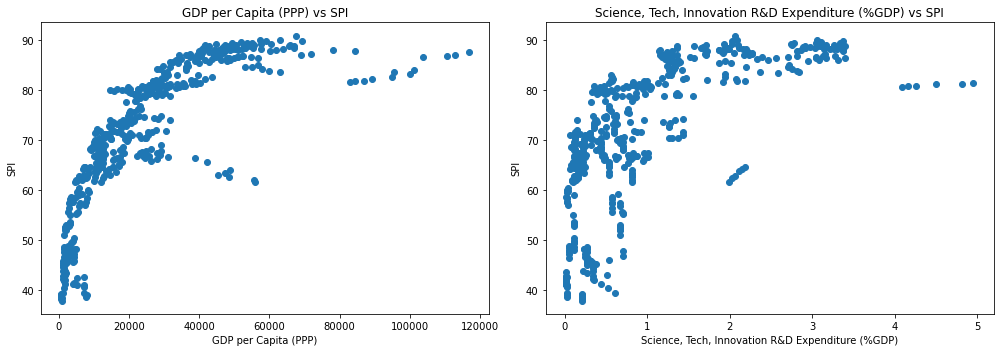

In [1703]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter((df['GDP per Capita (PPP)']), df['Social Progress Index'])
plt.xlabel('GDP per Capita (PPP)')
plt.ylabel('SPI')
plt.title('GDP per Capita (PPP) vs SPI')

plt.subplot(1, 2, 2)
plt.scatter((df['Science, Tech, Innovation R&D Expenditure (%GDP)']), df['Social Progress Index'])
plt.xlabel('Science, Tech, Innovation R&D Expenditure (%GDP)')
plt.ylabel('SPI')
plt.title('Science, Tech, Innovation R&D Expenditure (%GDP) vs SPI')

plt.tight_layout()

## Modeling with new Log Features

In [1743]:
df_logs = df.copy()
df_logs.shape

(522, 17)

In [1744]:
df_logs['log_GDP'] = np.log(df_logs['GDP per Capita (PPP)'])
df_logs['log_RD'] = np.log(df_logs['Science, Tech, Innovation R&D Expenditure (%GDP)'])

In [1745]:
test_holdout = df_logs[df_logs['Year'] == 2018]
X_test, y_test = test_holdout.drop(columns = ['Country', 'Country Code', 'Year', 'GDP per Capita (PPP)', 'Science, Tech, Innovation R&D Expenditure (%GDP)', 'SPI Year', 'Social Progress Index'], axis = 1), df_logs['Social Progress Index']

In [1746]:
modeling_set = df_logs[df_logs['Year'] != 2018]
X, y = modeling_set.drop(columns = ['Country', 'Country Code', 'Year', 'GDP per Capita (PPP)', 'Science, Tech, Innovation R&D Expenditure (%GDP)', 'SPI Year', 'Social Progress Index'], axis = 1), modeling_set['Social Progress Index']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [1747]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [1748]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}'+ '\n')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}'+ '\n')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}'+ '\n')

Linear Regression train R^2: 0.935
Linear Regression val R^2: 0.938

Ridge Regression train R^2: 0.934
Ridge Regression val R^2: 0.939

Degree 2 polynomial regression train R^2: 0.637
Degree 2 polynomial regression val R^2: 0.507



In [1756]:
lm.coef_.tolist()

[0.002723075028422376,
 -0.3002513981624479,
 -0.08876828297128966,
 0.03636927570332742,
 0.013770163724187837,
 0.3514069164739167,
 -1.4495036059765838,
 0.013074061464822512,
 0.021834567258915638,
 0.06907245916440474,
 10.764313129626807,
 2.0539500644567767]

In [1755]:
lm_reg.coef_.tolist()

[0.023709951571193322,
 -2.2647684423840677,
 -0.5551305143449236,
 0.27006690551242774,
 0.16938972270199393,
 0.5074607356740076,
 -2.609903892212283,
 0.31091762549052376,
 0.5403727157612127,
 0.8414155970503137,
 11.679045006889964,
 2.6384088480850783]

In [1753]:
X_train.columns.tolist()

['Budget Surplus or Deficit (%GDP)',
 'Gross Savings %GDP',
 'Inflation Rate on Consumer Prices (Annual %)',
 'Tax Revenue %GDP',
 'Health Expenditure (%GDP)',
 'Education Expenditure (%GDP)',
 'Military Expenditure %GDP',
 'Fossil Fuel (%)',
 'Hydroelectric Plants (%)',
 'Renewable Energy Sources (%)',
 'log_GDP',
 'log_RD']

## Cross Validation w/ Log Features


In [1741]:
from sklearn.model_selection import KFold

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [1742]:
#run the CV

kf = KFold(n_splits=5, shuffle=True)
cv_lm_train_r2s, cv_lm_reg_train_r2s, cv_lm_poly_train_r2s = [], [], []
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_poly_r2s = [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #define models
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)
    lm_poly = LinearRegression(fit_intercept=True)

    #fit models
    lm.fit(X_train, y_train)
    cv_lm_train_r2s.append(lm.score(X_train, y_train))
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_train_r2s.append(lm_reg.score(X_train_scaled, y_train))
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #poly
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_train_r2s.append(lm_poly.score(X_train_poly, y_train))
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
    
# print('Simple regression scores (train): ', cv_lm_train_r2s)
# print('Simple regression scores: ', cv_lm_r2s, '\n')
# print('Ridge scores (train): ', cv_lm_reg_train_r2s)
# print('Ridge scores: ', cv_lm_reg_r2s, '\n')
# print('Poly scores (train): ', cv_lm_poly_train_r2s)
# print('Poly scores: ', cv_lm_poly_r2s, '\n')


print(f'Simple mean cv (train) r^2: {np.mean(cv_lm_train_r2s):.3f} +- {np.std(cv_lm_train_r2s):.3f}')
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}' + '\n')

print(f'Ridge mean cv (train) r^2: {np.mean(cv_lm_reg_train_r2s):.3f} +- {np.std(cv_lm_reg_train_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}'+ '\n')

print(f'Poly mean cv (train) r^2: {np.mean(cv_lm_poly_train_r2s):.3f} +- {np.std(cv_lm_poly_train_r2s):.3f}')
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}'+ '\n')

Simple mean cv (train) r^2: 0.936 +- 0.001
Simple mean cv r^2: 0.928 +- 0.007

Ridge mean cv (train) r^2: 0.936 +- 0.001
Ridge mean cv r^2: 0.928 +- 0.006

Poly mean cv (train) r^2: 0.978 +- 0.003
Poly mean cv r^2: 0.916 +- 0.031



# Statsmodels w Logs

In [1713]:
df_processed

,Country,Country_Code,Year,GDP_per_Capita_PPP,Budget_Surplus_or_Deficit_GDP,Gross_Savings_GDP,Inflation_Rate_on_Consumer_Prices_Annual_,Tax_Revenue_GDP,Health_Expenditure_GDP,Education_Expenditure_GDP,Science_Tech_Innovation_RD_Expenditure_GDP,Military_Expenditure_GDP,Fossil_Fuel_,Hydroelectric_Plants_,Renewable_Energy_Sources_,SPI_Year,Social_Progress_Index
0,Angola,AGO,2013,7682.477158,0.900000,32.029882,8.777814,14.184763,37.049564,3.42132,0.032290,4.455239,36.800000,60.250000,1.587500,2014,38.51
1,Botswana,BWA,2013,14707.701699,-7.900000,36.664808,5.884607,25.609893,33.341854,9.63292,0.537280,2.056396,99.625000,0.000000,0.562500,2014,62.99
2,Burkina Faso,BFA,2013,1683.107411,4.800000,16.917850,0.533739,14.948642,28.408018,4.59384,0.509164,1.392049,81.725000,9.562500,8.737500,2014,42.94
3,Burundi,BDI,2013,740.984231,-1.500000,3.933888,7.937958,31.351000,33.161716,5.99536,0.210280,2.367638,13.800000,77.050000,10.400000,2014,38.10
6,Ethiopia,ETH,2013,1283.570926,-6.000000,28.334779,7.464022,8.764725,17.755827,4.49855,0.604740,0.806417,4.125000,83.562500,11.900000,2014,39.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,Malaysia,MYS,2018,28186.704943,0.300000,25.728034,0.884709,12.029692,21.869098,4.53477,1.436650,0.984002,78.000000,18.000000,4.000000,2019,74.17
553,Mongolia,MNG,2018,12196.750263,-11.133333,25.950801,6.812436,16.776785,30.284721,4.08578,0.102930,0.761588,87.000000,2.000000,11.000000,2019,65.60
554,New Zealand,NZL,2018,42810.837512,-4.800000,18.684779,1.598297,28.001078,35.873516,6.44277,1.365700,1.161388,23.266667,58.000000,20.000000,2019,88.93
556,Philippines,PHL,2018,8717.047981,0.000000,33.807051,5.211605,14.047533,19.911036,2.65295,0.164150,1.129324,68.900000,16.666667,15.733333,2019,63.40


In [1714]:
df_processed['log_GDP'] = np.log(df_processed['GDP_per_Capita_PPP'])
df_processed['log_RD'] = np.log(df_processed['Science_Tech_Innovation_RD_Expenditure_GDP'])

In [1715]:
test_holdout_processed = df_processed[df_processed['Year'] == 2018]
X_test_p, y_test_p = test_holdout_processed.drop(columns = ['Country', 'Country_Code', 'Year', 'SPI_Year', 'Social_Progress_Index'], axis = 1), df_processed['Social_Progress_Index']

In [1716]:
modeling_set_processed = df_processed[df_processed['Year'] != 2018]
X_p, y_p = modeling_set_processed.drop(columns = ['Country', 'Country_Code', 'Year', 'SPI_Year', 'Social_Progress_Index'], axis = 1), modeling_set_processed['Social_Progress_Index']
X_train_p, X_val_p, y_train_p, y_val_p = train_test_split(X_p, y_p, test_size=0.2)

In [1717]:
x_terms = ' + '.join([col_name.replace('(', '').replace('%', '').replace(')', '') for col_name in X_train_p.columns.tolist()])
y_term = 'Social_Progress_Index'
x_terms

'GDP_per_Capita_PPP + Budget_Surplus_or_Deficit_GDP + Gross_Savings_GDP + Inflation_Rate_on_Consumer_Prices_Annual_ + Tax_Revenue_GDP + Health_Expenditure_GDP + Education_Expenditure_GDP + Science_Tech_Innovation_RD_Expenditure_GDP + Military_Expenditure_GDP + Fossil_Fuel_ + Hydroelectric_Plants_ + Renewable_Energy_Sources_ + log_GDP + log_RD'

In [1718]:
# Define the model
lm1 = smf.ols(y_term + ' ~ ' + x_terms, data=modeling_set_processed)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Social_Progress_Index   R-squared:                       0.942
Model:                               OLS   Adj. R-squared:                  0.940
Method:                    Least Squares   F-statistic:                     484.7
Date:                   Thu, 16 Jul 2020   Prob (F-statistic):          5.45e-249
Time:                           13:25:20   Log-Likelihood:                -1160.8
No. Observations:                    435   AIC:                             2352.
Df Residuals:                        420   BIC:                             2413.
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                    -37.1782      3.569    -10.418      0.000     -44.193     -30.164
GDP_per_Capita_PPP                            -0.0001   1.83e-05     -6.584      0.000      -0.000   -8.45e-05
Budget_Surplus_or_Deficit_GDP                  0.0246      0.022      1.126      0.261      -0.018       0.068
Gross_Savings_GDP                             -0.2767      0.025    -10.868      0.000      -0.327      -0.227
Inflation_Rate_on_Consumer_Prices_Annual_     -0.0996      0.029     -3.394      0.001      -0.157      -0.042
Tax_Revenue_GDP                                0.0368      0.031      1.186      0.236      -0.024       0.098
Health_Expenditure_GDP                        -0.0107      0.029     -0.365      0.716      -0.069       0.047
Education_Expenditure_GDP                      0.3251      0.144      2.262      0.024       0.043       0.608
Science_Tech_Innovation_RD_Expenditure_GDP     0.4610      0.350      1.317      0.189      -0.227       1.149
Military_Expenditure_GDP                      -1.3057      0.120    -10.891      0.000      -1.541      -1.070
Fossil_Fuel_                                  -0.0094      0.022     -0.434      0.665      -0.052       0.033
Hydroelectric_Plants_                          0.0098      0.022      0.446      0.656      -0.033       0.053
Renewable_Energy_Sources_                      0.0601      0.025      2.370      0.018       0.010       0.110
log_GDP                                       12.2665      0.334     36.679      0.000      11.609      12.924
log_RD                                         2.2873      0.266      8.614      0.000       1.765       2.809
==============================================================================
Omnibus:                       49.983   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.672
Skew:                          -0.780   Prob(JB):                     1.66e-16
Kurtosis:                       4.255   Cond. No.                     6.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dropping Fossil_Fuel feature

In [1672]:
df_processed1 = df_processed.drop(columns=['Fossil_Fuel_'])

In [1673]:
test_holdout = df_processed1[df_processed1['Year'] == 2018]
X_test_p, y_test_p = test_holdout.drop(columns = ['Country', 'Country_Code', 'Year', 'SPI_Year', 'Social_Progress_Index'], axis = 1), df_processed1['Social_Progress_Index']

In [1674]:
modeling_set_processed = df_processed1[df_processed1['Year'] != 2018]
X_p, y_p = modeling_set_processed.drop(columns = ['Country', 'Country_Code', 'Year', 'SPI_Year', 'Social_Progress_Index'], axis = 1), modeling_set_processed['Social_Progress_Index']
X_train_p, X_val_p, y_train_p, y_val_p = train_test_split(X_p, y_p, test_size=0.2)

In [1675]:
x_terms = ' + '.join([col_name.replace('(', '').replace('%', '').replace(')', '') for col_name in X_train_p.columns.tolist()])
y_term = 'Social_Progress_Index'
x_terms

'GDP_per_Capita_PPP + Budget_Surplus_or_Deficit_GDP + Gross_Savings_GDP + Inflation_Rate_on_Consumer_Prices_Annual_ + Tax_Revenue_GDP + Health_Expenditure_GDP + Education_Expenditure_GDP + Science_Tech_Innovation_RD_Expenditure_GDP + Military_Expenditure_GDP + Hydroelectric_Plants_ + Renewable_Energy_Sources_ + log_GDP + log_RD'

In [1676]:
# Define the model
lm1 = smf.ols(y_term + ' ~ ' + x_terms, data=modeling_set_processed)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Social_Progress_Index   R-squared:                       0.942
Model:                               OLS   Adj. R-squared:                  0.940
Method:                    Least Squares   F-statistic:                     523.0
Date:                   Thu, 16 Jul 2020   Prob (F-statistic):          2.57e-250
Time:                           13:22:13   Log-Likelihood:                -1160.9
No. Observations:                    435   AIC:                             2350.
Df Residuals:                        421   BIC:                             2407.
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                    -38.0172      2.995    -12.692      0.000     -43.905     -32.129
GDP_per_Capita_PPP                            -0.0001   1.81e-05     -6.601      0.000      -0.000   -8.38e-05
Budget_Surplus_or_Deficit_GDP                  0.0248      0.022      1.134      0.257      -0.018       0.068
Gross_Savings_GDP                             -0.2774      0.025    -10.933      0.000      -0.327      -0.228
Inflation_Rate_on_Consumer_Prices_Annual_     -0.0997      0.029     -3.402      0.001      -0.157      -0.042
Tax_Revenue_GDP                                0.0348      0.031      1.135      0.257      -0.025       0.095
Health_Expenditure_GDP                        -0.0055      0.027     -0.204      0.839      -0.058       0.047
Education_Expenditure_GDP                      0.3163      0.142      2.226      0.027       0.037       0.596
Science_Tech_Innovation_RD_Expenditure_GDP     0.4790      0.347      1.379      0.169      -0.204       1.162
Military_Expenditure_GDP                      -1.3171      0.117    -11.274      0.000      -1.547      -1.087
Hydroelectric_Plants_                          0.0189      0.007      2.564      0.011       0.004       0.033
Renewable_Energy_Sources_                      0.0679      0.018      3.779      0.000       0.033       0.103
log_GDP                                       12.2516      0.332     36.863      0.000      11.598      12.905
log_RD                                         2.2814      0.265      8.612      0.000       1.761       2.802
==============================================================================
Omnibus:                       49.923   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.926
Skew:                          -0.777   Prob(JB):                     1.46e-16
Kurtosis:                       4.268   Cond. No.                     5.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dropping Health Expenditure

In [1624]:
df_processed1 = df_processed.drop(columns=['Health_Expenditure_GDP', 'Fossil_Fuel_', 'GDP_per_Capita_PPP', 'Science_Tech_Innovation_RD_Expenditure_GDP'])

In [1625]:
test_holdout = df_processed1[df_processed1['Year'] == 2018]
X_test_p, y_test_p = test_holdout.drop(columns = ['Country', 'Country_Code', 'Year', 'SPI_Year', 'Social_Progress_Index'], axis = 1), df_processed1['Social_Progress_Index']

In [1626]:
modeling_set_processed = df_processed1[df_processed1['Year'] != 2018]
X_p, y_p = modeling_set_processed.drop(columns = ['Country', 'Country_Code', 'Year', 'SPI_Year', 'Social_Progress_Index'], axis = 1), modeling_set_processed['Social_Progress_Index']
X_train_p, X_val_p, y_train_p, y_val_p = train_test_split(X_p, y_p, test_size=0.2)

In [1627]:
x_terms = ' + '.join([col_name.replace('(', '').replace('%', '').replace(')', '') for col_name in X_train_p.columns.tolist()])
y_term = 'Social_Progress_Index'
x_terms

'Budget_Surplus_or_Deficit_GDP + Gross_Savings_GDP + Inflation_Rate_on_Consumer_Prices_Annual_ + Tax_Revenue_GDP + Education_Expenditure_GDP + Military_Expenditure_GDP + Hydroelectric_Plants_ + Renewable_Energy_Sources_ + log_GDP + log_RD'

In [1628]:
# Define the model
lm1 = smf.ols(y_term + ' ~ ' + x_terms, data=modeling_set_processed)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Social_Progress_Index   R-squared:                       0.936
Model:                               OLS   Adj. R-squared:                  0.934
Method:                    Least Squares   F-statistic:                     615.9
Date:                   Thu, 16 Jul 2020   Prob (F-statistic):          2.13e-245
Time:                           12:59:11   Log-Likelihood:                -1182.5
No. Observations:                    435   AIC:                             2387.
Df Residuals:                        424   BIC:                             2432.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   -25.6282      2.428    -10.556      0.000     -30.401     -20.856
Budget_Surplus_or_Deficit_GDP                 0.0036      0.023      0.159      0.874      -0.041       0.048
Gross_Savings_GDP                            -0.2962      0.025    -11.684      0.000      -0.346      -0.246
Inflation_Rate_on_Consumer_Prices_Annual_    -0.0919      0.030     -3.036      0.003      -0.151      -0.032
Tax_Revenue_GDP                               0.0302      0.029      1.055      0.292      -0.026       0.086
Education_Expenditure_GDP                     0.3524      0.144      2.454      0.015       0.070       0.635
Military_Expenditure_GDP                     -1.3769      0.119    -11.615      0.000      -1.610      -1.144
Hydroelectric_Plants_                         0.0109      0.007      1.460      0.145      -0.004       0.026
Renewable_Energy_Sources_                     0.0453      0.018      2.556      0.011       0.010       0.080
log_GDP                                      10.7770      0.242     44.480      0.000      10.301      11.253
log_RD                                        2.1587      0.199     10.846      0.000       1.767       2.550
==============================================================================
Omnibus:                       56.842   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.206
Skew:                          -0.831   Prob(JB):                     4.26e-20
Kurtosis:                       4.470   Cond. No.                         664.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Dropping all energy terms

In [1719]:
df_processed2 = df_processed.drop(columns=['Health_Expenditure_GDP', 'Fossil_Fuel_', 'Hydroelectric_Plants_', 'Renewable_Energy_Sources_', 'GDP_per_Capita_PPP', 'Science_Tech_Innovation_RD_Expenditure_GDP'])

In [1723]:
test_holdout = df_processed2[df_processed1['Year'] == 2018]
X_test_p, y_test_p = test_holdout.drop(columns = ['Country', 'Country_Code', 'Year', 'SPI_Year', 'Social_Progress_Index'], axis = 1), df_processed2['Social_Progress_Index']

In [1724]:
modeling_set_processed = df_processed2[df_processed2['Year'] != 2018]
X_p, y_p = modeling_set_processed.drop(columns = ['Country', 'Country_Code', 'Year', 'SPI_Year', 'Social_Progress_Index'], axis = 1), modeling_set_processed['Social_Progress_Index']
X_train_p, X_val_p, y_train_p, y_val_p = train_test_split(X_p, y_p, test_size=0.2)

In [1725]:
x_terms = ' + '.join([col_name.replace('(', '').replace('%', '').replace(')', '') for col_name in X_train_p.columns.tolist()])
y_term = 'Social_Progress_Index'
x_terms

'Budget_Surplus_or_Deficit_GDP + Gross_Savings_GDP + Inflation_Rate_on_Consumer_Prices_Annual_ + Tax_Revenue_GDP + Education_Expenditure_GDP + Military_Expenditure_GDP + log_GDP + log_RD'

In [1726]:
# Define the model
lm1 = smf.ols(y_term + ' ~ ' + x_terms, data=modeling_set_processed)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Social_Progress_Index   R-squared:                       0.935
Model:                               OLS   Adj. R-squared:                  0.933
Method:                    Least Squares   F-statistic:                     759.8
Date:                   Thu, 16 Jul 2020   Prob (F-statistic):          9.67e-247
Time:                           13:35:17   Log-Likelihood:                -1186.1
No. Observations:                    435   AIC:                             2390.
Df Residuals:                        426   BIC:                             2427.
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   -25.7182      2.365    -10.873      0.000     -30.367     -21.069
Budget_Surplus_or_Deficit_GDP                -0.0033      0.023     -0.147      0.884      -0.048       0.041
Gross_Savings_GDP                            -0.3051      0.025    -12.108      0.000      -0.355      -0.256
Inflation_Rate_on_Consumer_Prices_Annual_    -0.1055      0.030     -3.529      0.000      -0.164      -0.047
Tax_Revenue_GDP                               0.0365      0.029      1.275      0.203      -0.020       0.093
Education_Expenditure_GDP                     0.3887      0.143      2.723      0.007       0.108       0.669
Military_Expenditure_GDP                     -1.5149      0.107    -14.134      0.000      -1.726      -1.304
log_GDP                                      10.8989      0.229     47.535      0.000      10.448      11.350
log_RD                                        2.1279      0.199     10.691      0.000       1.737       2.519
==============================================================================
Omnibus:                       44.705   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.856
Skew:                          -0.735   Prob(JB):                     3.70e-14
Kurtosis:                       4.119   Cond. No.                         429.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Testing Lasso and Lasso+Poly without Log Features

In [1631]:
X_p

,Budget_Surplus_or_Deficit_GDP,Gross_Savings_GDP,Inflation_Rate_on_Consumer_Prices_Annual_,Tax_Revenue_GDP,Education_Expenditure_GDP,Military_Expenditure_GDP,Hydroelectric_Plants_,Renewable_Energy_Sources_,log_GDP,log_RD
0,0.900000,32.029882,8.777814,14.184763,3.42132,4.455239,60.250000,1.587500,8.946697,-3.432998
1,-7.900000,36.664808,5.884607,25.609893,9.63292,2.056396,0.000000,0.562500,9.596127,-0.621236
2,4.800000,16.917850,0.533739,14.948642,4.59384,1.392049,9.562500,8.737500,7.428397,-0.674985
3,-1.500000,3.933888,7.937958,31.351000,5.99536,2.367638,77.050000,10.400000,6.607979,-1.559315
6,-6.000000,28.334779,7.464022,8.764725,4.49855,0.806417,83.562500,11.900000,7.157401,-0.502957
...,...,...,...,...,...,...,...,...,...,...
459,0.300000,28.349530,3.871201,12.952213,4.74071,1.116541,18.000000,4.000000,10.190482,0.362314
460,-11.133333,21.226078,4.310763,13.612229,4.08578,0.744867,2.000000,11.000000,9.333601,-2.004334
461,-4.800000,19.589518,1.850788,27.484193,6.44277,1.208463,58.000000,20.000000,10.633281,0.311667
463,0.000000,35.488632,2.853188,13.593794,2.65295,1.197535,16.666667,15.733333,9.002189,-1.806975


In [1629]:
from sklearn.model_selection import KFold

#this helps with the way kf will generate indices below
X, y = np.array(X_p), np.array(y_p)

In [1630]:
#run the CV

kf = KFold(n_splits=5, shuffle=True)
cv_lm_train_r2s, cv_lm_reg_train_r2s, cv_lm_lasso_train_r2s, cv_lm_poly_train_r2s, cv_lm_poly_lasso_train_r2s = [], [], [], [], []
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_lasso_r2s, cv_lm_poly_r2s, cv_lm_poly_lasso_r2s = [], [], [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #define models
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)
    lm_lasso = Lasso(alpha=1)
    lm_poly = LinearRegression(fit_intercept=True)
    lm_poly_lasso = Lasso(alpha=1)

    #fit models
    lm.fit(X_train, y_train)
    cv_lm_train_r2s.append(lm.score(X_train, y_train))
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_train_r2s.append(lm_reg.score(X_train_scaled, y_train))
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #Lasso with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_train_r2s.append(lm_reg.score(X_train_scaled, y_train))
    cv_lm_lasso_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    
    #poly
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_train_r2s.append(lm_poly.score(X_train_poly, y_train))
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
    #poly + lasso (w scaling of poly terms)
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.transform(X_val_poly)
    
    lm_reg.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_lasso_train_r2s.append(lm_reg.score(X_train_poly_scaled, y_train))
    cv_lm_poly_lasso_r2s.append(lm_reg.score(X_val_poly_scaled, y_val))
    
    
# print('Simple regression scores (train): ', cv_lm_train_r2s)
# print('Simple regression scores: ', cv_lm_r2s, '\n')
# print('Ridge scores (train): ', cv_lm_reg_train_r2s)
# print('Ridge scores: ', cv_lm_reg_r2s, '\n')
# print('Poly scores (train): ', cv_lm_poly_train_r2s)
# print('Poly scores: ', cv_lm_poly_r2s, '\n')


print(f'Simple mean cv (train) r^2: {np.mean(cv_lm_train_r2s):.3f} +- {np.std(cv_lm_train_r2s):.3f}')
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}' + '\n')

print(f'Ridge mean cv (train) r^2: {np.mean(cv_lm_reg_train_r2s):.3f} +- {np.std(cv_lm_reg_train_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}'+ '\n')

print(f'Lasso mean cv (train) r^2: {np.mean(cv_lm_lasso_train_r2s):.3f} +- {np.std(cv_lm_lasso_train_r2s):.3f}')
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}'+ '\n')

print(f'Poly mean cv (train) r^2: {np.mean(cv_lm_poly_train_r2s):.3f} +- {np.std(cv_lm_poly_train_r2s):.3f}')
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}'+ '\n')

print(f'Poly + Lasso mean cv (train) r^2: {np.mean(cv_lm_poly_lasso_train_r2s):.3f} +- {np.std(cv_lm_poly_lasso_train_r2s):.3f}')
print(f'Poly + Lasso mean cv r^2: {np.mean(cv_lm_poly_lasso_r2s):.3f} +- {np.std(cv_lm_poly_lasso_r2s):.3f}'+ '\n')

Simple mean cv (train) r^2: 0.936 +- 0.004
Simple mean cv r^2: 0.930 +- 0.018

Ridge mean cv (train) r^2: 0.936 +- 0.004
Ridge mean cv r^2: 0.930 +- 0.018

Lasso mean cv (train) r^2: 0.936 +- 0.004
Lasso mean cv r^2: 0.930 +- 0.018

Poly mean cv (train) r^2: 0.934 +- 0.023
Poly mean cv r^2: 0.806 +- 0.144

Poly + Lasso mean cv (train) r^2: 0.968 +- 0.003
Poly + Lasso mean cv r^2: 0.936 +- 0.030



# Testing Lasso and Lasso+Poly models with Log Features

In [1727]:
df_prep = df.copy().dropna(axis = 0)

In [1728]:
df_prep['log_GDP'] = np.log(df_prep['GDP per Capita (PPP)'])
df_prep['log_RD'] = np.log(df_prep['Science, Tech, Innovation R&D Expenditure (%GDP)'])

In [1729]:
test_holdout = df_prep[df_prep['Year'] == 2018]
X_test, y_test = test_holdout.drop(columns = ['Country', 'Country Code', 'Year', 'SPI Year', 'Social Progress Index'], axis = 1), df_prep['Social Progress Index']

In [1730]:
modeling_set = df_prep[df_prep['Year'] != 2018]
X, y = modeling_set.drop(columns = ['Country', 'Country Code', 'SPI Year', 'Year', 'Social Progress Index'], axis = 1), modeling_set['Social Progress Index']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [1731]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)
lm_lasso = Lasso(alpha = 1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()
lm_poly_lasso = Lasso(alpha=100000)

In [1732]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}' + '\n')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}' + '\n')

lm_lasso.fit(X_train_scaled, y_train)
print(f'Lasso Regression train R^2: {lm_lasso.score(X_train_scaled, y_train):.3f}')
print(f'Lasso Regression val R^2: {lm_lasso.score(X_val_scaled, y_val):.3f}' + '\n')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}' + '\n')

lm_poly_lasso.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial+Lasso regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial+Lasso regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}' + '\n')

Linear Regression train R^2: 0.944
Linear Regression val R^2: 0.925

Ridge Regression train R^2: 0.944
Ridge Regression val R^2: 0.926

Lasso Regression train R^2: 0.914
Lasso Regression val R^2: 0.928

Degree 2 polynomial regression train R^2: 0.966
Degree 2 polynomial regression val R^2: 0.738

Degree 2 polynomial+Lasso regression train R^2: 0.966
Degree 2 polynomial+Lasso regression val R^2: 0.738



/Users/emilyng/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.425504452752648, tolerance: 7.348839496867819
  model = cd_fast.enet_coordinate_descent(


In [1418]:
#run the CV
X, y = np.array(X), np.array(y)
kf = KFold(n_splits=5, shuffle=True)
cv_lm_train_r2s, cv_lm_reg_train_r2s, cv_lm_lasso_train_r2s, cv_lm_poly_train_r2s, cv_lm_poly_reg_train_r2s, cv_lm_poly_lasso_train_r2s = [], [], [], [], [], []
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_lasso_r2s, cv_lm_poly_r2s, cv_lm_poly_reg_r2s, cv_lm_poly_lasso_r2s = [], [], [], [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #define models
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)
    lm_lasso = Lasso(alpha=1)
    lm_poly = LinearRegression(fit_intercept=True)
    lm_poly_lasso = Lasso(alpha=1)

    #fit models
    lm.fit(X_train, y_train)
    cv_lm_train_r2s.append(lm.score(X_train, y_train))
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_train_r2s.append(lm_reg.score(X_train_scaled, y_train))
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #Lasso with scaled features
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_train_r2s.append(lm_reg.score(X_train_scaled, y_train))
    cv_lm_lasso_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #poly
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_train_r2s.append(lm_poly.score(X_train_poly, y_train))
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
    #poly + lasso (w scaling of poly terms)
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.transform(X_val_poly)
    
    lm_reg.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_reg_train_r2s.append(lm_reg.score(X_train_poly_scaled, y_train))
    cv_lm_poly_reg_r2s.append(lm_reg.score(X_val_poly_scaled, y_val))
    
    lm_lasso.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_lasso_train_r2s.append(lm_lasso.score(X_train_poly_scaled, y_train))
    cv_lm_poly_lasso_r2s.append(lm_lasso.score(X_val_poly_scaled, y_val))
    
    
# print('Simple regression scores (train): ', cv_lm_train_r2s)
# print('Simple regression scores: ', cv_lm_r2s, '\n')
# print('Ridge scores (train): ', cv_lm_reg_train_r2s)
# print('Ridge scores: ', cv_lm_reg_r2s, '\n')
# print('Poly scores (train): ', cv_lm_poly_train_r2s)
# print('Poly scores: ', cv_lm_poly_r2s, '\n')


print(f'Simple mean cv (train) r^2: {np.mean(cv_lm_train_r2s):.3f} +- {np.std(cv_lm_train_r2s):.3f}')
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}' + '\n')

print(f'Ridge mean cv (train) r^2: {np.mean(cv_lm_reg_train_r2s):.3f} +- {np.std(cv_lm_reg_train_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}'+ '\n')

print(f'Lasso mean cv (train) r^2: {np.mean(cv_lm_lasso_train_r2s):.3f} +- {np.std(cv_lm_lasso_train_r2s):.3f}')
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}'+ '\n')

print(f'Poly mean cv (train) r^2: {np.mean(cv_lm_poly_train_r2s):.3f} +- {np.std(cv_lm_poly_train_r2s):.3f}')
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}'+ '\n')

print(f'Poly + Ridge mean cv (train) r^2: {np.mean(cv_lm_poly_reg_train_r2s):.3f} +- {np.std(cv_lm_poly_reg_train_r2s):.3f}')
print(f'Poly + Ridge mean cv r^2: {np.mean(cv_lm_poly_reg_r2s):.3f} +- {np.std(cv_lm_poly_reg_r2s):.3f}'+ '\n')

print(f'Poly + Lasso mean cv (train) r^2: {np.mean(cv_lm_poly_lasso_train_r2s):.3f} +- {np.std(cv_lm_poly_lasso_train_r2s):.3f}')
print(f'Poly + Lasso mean cv r^2: {np.mean(cv_lm_poly_lasso_r2s):.3f} +- {np.std(cv_lm_poly_lasso_r2s):.3f}'+ '\n')

Simple mean cv (train) r^2: 0.942 +- 0.004
Simple mean cv r^2: 0.933 +- 0.020

Ridge mean cv (train) r^2: 0.942 +- 0.004
Ridge mean cv r^2: 0.933 +- 0.020

Lasso mean cv (train) r^2: 0.942 +- 0.004
Lasso mean cv r^2: 0.933 +- 0.020

Poly mean cv (train) r^2: 0.987 +- 0.004
Poly mean cv r^2: 0.890 +- 0.073

Poly + Ridge mean cv (train) r^2: 0.979 +- 0.002
Poly + Ridge mean cv r^2: 0.953 +- 0.035

Poly + Lasso mean cv (train) r^2: 0.924 +- 0.005
Poly + Lasso mean cv r^2: 0.913 +- 0.027



In [1419]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_scaled, y_train)
ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [1420]:
lasso_model.alpha_

0.024094035602395245

In [1421]:
ridge_model.alpha_

0.1933891750455231

In [1422]:
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train_poly_scaled, y_train)

/Users/emilyng/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.305139656699339, tolerance: 5.813158504748201
  model = cd_fast.enet_coordinate_descent_gram(


RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [1423]:
lasso_model.alpha_

0.024094035602395245

In [1424]:
ridge_model.alpha_

8.21434358491943

In [1453]:
#run the CV
X, y = np.array(X), np.array(y)
kf = KFold(n_splits=5, shuffle=True)
cv_lm_train_r2s, cv_lm_reg_train_r2s, cv_lm_lasso_train_r2s, cv_lm_poly_train_r2s, cv_lm_poly_reg_train_r2s, cv_lm_poly_lasso_train_r2s = [], [], [], [], [], []
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_lasso_r2s, cv_lm_poly_r2s, cv_lm_poly_reg_r2s, cv_lm_poly_lasso_r2s = [], [], [], [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #define models
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=10)
    lm_lasso = Lasso(alpha=10)
    lm_poly = LinearRegression(fit_intercept=True)
    lm_poly_reg = Ridge(alpha=100)
    lm_poly_lasso = Lasso(alpha=100)

    #fit models
    lm.fit(X_train, y_train)
    cv_lm_train_r2s.append(lm.score(X_train, y_train))
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_train_r2s.append(lm_reg.score(X_train_scaled, y_train))
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #Lasso with scaled features
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_train_r2s.append(lm_reg.score(X_train_scaled, y_train))
    cv_lm_lasso_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #poly
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_train_r2s.append(lm_poly.score(X_train_poly, y_train))
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
    #poly + ridge and poly + lasso (w scaling of poly terms)
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.transform(X_val_poly)
    
    lm_poly_reg.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_reg_train_r2s.append(lm_poly_reg.score(X_train_poly_scaled, y_train))
    cv_lm_poly_reg_r2s.append(lm_poly_reg.score(X_val_poly_scaled, y_val))
    
    lm_lasso.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_lasso_train_r2s.append(lm_lasso.score(X_train_poly_scaled, y_train))
    cv_lm_poly_lasso_r2s.append(lm_lasso.score(X_val_poly_scaled, y_val))
    
    
# print('Simple regression scores (train): ', cv_lm_train_r2s)
# print('Simple regression scores: ', cv_lm_r2s, '\n')
# print('Ridge scores (train): ', cv_lm_reg_train_r2s)
# print('Ridge scores: ', cv_lm_reg_r2s, '\n')
# print('Poly scores (train): ', cv_lm_poly_train_r2s)
# print('Poly scores: ', cv_lm_poly_r2s, '\n')


print(f'Simple mean cv (train) r^2: {np.mean(cv_lm_train_r2s):.3f} +- {np.std(cv_lm_train_r2s):.3f}')
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}' + '\n')

print(f'Ridge mean cv (train) r^2: {np.mean(cv_lm_reg_train_r2s):.3f} +- {np.std(cv_lm_reg_train_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}'+ '\n')

print(f'Lasso mean cv (train) r^2: {np.mean(cv_lm_lasso_train_r2s):.3f} +- {np.std(cv_lm_lasso_train_r2s):.3f}')
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}'+ '\n')

print(f'Poly mean cv (train) r^2: {np.mean(cv_lm_poly_train_r2s):.3f} +- {np.std(cv_lm_poly_train_r2s):.3f}')
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}'+ '\n')

print(f'Poly + Ridge mean cv (train) r^2: {np.mean(cv_lm_poly_reg_train_r2s):.3f} +- {np.std(cv_lm_poly_reg_train_r2s):.3f}')
print(f'Poly + Ridge mean cv r^2: {np.mean(cv_lm_poly_reg_r2s):.3f} +- {np.std(cv_lm_poly_reg_r2s):.3f}'+ '\n')

print(f'Poly + Lasso mean cv (train) r^2: {np.mean(cv_lm_poly_lasso_train_r2s):.3f} +- {np.std(cv_lm_poly_lasso_train_r2s):.3f}')
print(f'Poly + Lasso mean cv r^2: {np.mean(cv_lm_poly_lasso_r2s):.3f} +- {np.std(cv_lm_poly_lasso_r2s):.3f}'+ '\n')

Simple mean cv (train) r^2: 0.936 +- 0.002
Simple mean cv r^2: 0.930 +- 0.012

Ridge mean cv (train) r^2: 0.935 +- 0.002
Ridge mean cv r^2: 0.929 +- 0.012

Lasso mean cv (train) r^2: 0.935 +- 0.002
Lasso mean cv r^2: 0.929 +- 0.012

Poly mean cv (train) r^2: 0.968 +- 0.033
Poly mean cv r^2: 0.890 +- 0.043

Poly + Ridge mean cv (train) r^2: 0.936 +- 0.003
Poly + Ridge mean cv r^2: 0.921 +- 0.021

Poly + Lasso mean cv (train) r^2: 0.363 +- 0.011
Poly + Lasso mean cv r^2: 0.352 +- 0.017



# Modeling with Log Features (again)

In [1405]:
df_prep = df.copy().dropna(axis = 0)

In [1431]:
df_prep['log_GDP'] = np.log(df_prep['GDP per Capita (PPP)'])
df_prep['log_RD'] = np.log(df_prep['Science, Tech, Innovation R&D Expenditure (%GDP)'])
df_prep.drop(columns= 'GDP per Capita (PPP)', axis = 1, inplace=True)

In [1432]:
df_prep

,Country,Country Code,Year,Budget Surplus or Deficit (%GDP),Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),SPI Year,Social Progress Index,log_GDP,log_RD
0,Angola,AGO,2013,0.900000,32.029882,8.777814,14.184763,37.049564,3.42132,0.032290,4.455239,36.800000,60.250000,1.587500,2014,38.51,8.946697,-3.432998
1,Botswana,BWA,2013,-7.900000,36.664808,5.884607,25.609893,33.341854,9.63292,0.537280,2.056396,99.625000,0.000000,0.562500,2014,62.99,9.596127,-0.621236
2,Burkina Faso,BFA,2013,4.800000,16.917850,0.533739,14.948642,28.408018,4.59384,0.509164,1.392049,81.725000,9.562500,8.737500,2014,42.94,7.428397,-0.674985
3,Burundi,BDI,2013,-1.500000,3.933888,7.937958,31.351000,33.161716,5.99536,0.210280,2.367638,13.800000,77.050000,10.400000,2014,38.10,6.607979,-1.559315
6,Ethiopia,ETH,2013,-6.000000,28.334779,7.464022,8.764725,17.755827,4.49855,0.604740,0.806417,4.125000,83.562500,11.900000,2014,39.31,7.157401,-0.502957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,Malaysia,MYS,2018,0.300000,25.728034,0.884709,12.029692,21.869098,4.53477,1.436650,0.984002,78.000000,18.000000,4.000000,2019,74.17,10.246606,0.362314
553,Mongolia,MNG,2018,-11.133333,25.950801,6.812436,16.776785,30.284721,4.08578,0.102930,0.761588,87.000000,2.000000,11.000000,2019,65.60,9.408925,-2.273706
554,New Zealand,NZL,2018,-4.800000,18.684779,1.598297,28.001078,35.873516,6.44277,1.365700,1.161388,23.266667,58.000000,20.000000,2019,88.93,10.664547,0.311667
556,Philippines,PHL,2018,0.000000,33.807051,5.211605,14.047533,19.911036,2.65295,0.164150,1.129324,68.900000,16.666667,15.733333,2019,63.40,9.073036,-1.806975


In [1433]:
test_holdout = df_prep[df_prep['Year'] == 2018]
X_test, y_test = test_holdout.drop(columns = ['Country', 'Country Code', 'Year', 'SPI Year', 'Social Progress Index'], axis = 1), df_prep['Social Progress Index']

In [1434]:
modeling_set = df_prep[df_prep['Year'] != 2018]
X, y = modeling_set.drop(columns = ['Country', 'Country Code', 'SPI Year', 'Year', 'Social Progress Index'], axis = 1), modeling_set['Social Progress Index']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [1437]:
#run the CV
X, y = np.array(X), np.array(y)
kf = KFold(n_splits=5, shuffle=True)
cv_lm_train_r2s, cv_lm_reg_train_r2s, cv_lm_lasso_train_r2s, cv_lm_poly_train_r2s, cv_lm_poly_reg_train_r2s, cv_lm_poly_lasso_train_r2s = [], [], [], [], [], []
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_lasso_r2s, cv_lm_poly_r2s, cv_lm_poly_reg_r2s, cv_lm_poly_lasso_r2s = [], [], [], [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #define models
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=0.193389)
    lm_lasso = Lasso(alpha=0.02409)
    lm_poly = LinearRegression(fit_intercept=True)
    lm_poly_reg = Ridge(alpha=8.21434)
    lm_poly_lasso = Lasso(alpha=0.02409)

    #fit models
    lm.fit(X_train, y_train)
    cv_lm_train_r2s.append(lm.score(X_train, y_train))
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_train_r2s.append(lm_reg.score(X_train_scaled, y_train))
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #Lasso with scaled features
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_train_r2s.append(lm_reg.score(X_train_scaled, y_train))
    cv_lm_lasso_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #poly
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_train_r2s.append(lm_poly.score(X_train_poly, y_train))
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
    #poly + ridge and poly + lasso (w scaling of poly terms)
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.transform(X_val_poly)
    
    lm_poly_reg.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_reg_train_r2s.append(lm_poly_reg.score(X_train_poly_scaled, y_train))
    cv_lm_poly_reg_r2s.append(lm_poly_reg.score(X_val_poly_scaled, y_val))
    
    lm_lasso.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_lasso_train_r2s.append(lm_lasso.score(X_train_poly_scaled, y_train))
    cv_lm_poly_lasso_r2s.append(lm_lasso.score(X_val_poly_scaled, y_val))
    
    
# print('Simple regression scores (train): ', cv_lm_train_r2s)
# print('Simple regression scores: ', cv_lm_r2s, '\n')
# print('Ridge scores (train): ', cv_lm_reg_train_r2s)
# print('Ridge scores: ', cv_lm_reg_r2s, '\n')
# print('Poly scores (train): ', cv_lm_poly_train_r2s)
# print('Poly scores: ', cv_lm_poly_r2s, '\n')


print(f'Simple mean cv (train) r^2: {np.mean(cv_lm_train_r2s):.3f} +- {np.std(cv_lm_train_r2s):.3f}')
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}' + '\n')

print(f'Ridge mean cv (train) r^2: {np.mean(cv_lm_reg_train_r2s):.3f} +- {np.std(cv_lm_reg_train_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}'+ '\n')

print(f'Lasso mean cv (train) r^2: {np.mean(cv_lm_lasso_train_r2s):.3f} +- {np.std(cv_lm_lasso_train_r2s):.3f}')
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}'+ '\n')

print(f'Poly mean cv (train) r^2: {np.mean(cv_lm_poly_train_r2s):.3f} +- {np.std(cv_lm_poly_train_r2s):.3f}')
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}'+ '\n')

print(f'Poly + Ridge mean cv (train) r^2: {np.mean(cv_lm_poly_reg_train_r2s):.3f} +- {np.std(cv_lm_poly_reg_train_r2s):.3f}')
print(f'Poly + Ridge mean cv r^2: {np.mean(cv_lm_poly_reg_r2s):.3f} +- {np.std(cv_lm_poly_reg_r2s):.3f}'+ '\n')

print(f'Poly + Lasso mean cv (train) r^2: {np.mean(cv_lm_poly_lasso_train_r2s):.3f} +- {np.std(cv_lm_poly_lasso_train_r2s):.3f}')
print(f'Poly + Lasso mean cv r^2: {np.mean(cv_lm_poly_lasso_r2s):.3f} +- {np.std(cv_lm_poly_lasso_r2s):.3f}'+ '\n')

Simple mean cv (train) r^2: 0.936 +- 0.002
Simple mean cv r^2: 0.926 +- 0.009

Ridge mean cv (train) r^2: 0.936 +- 0.002
Ridge mean cv r^2: 0.926 +- 0.009

Lasso mean cv (train) r^2: 0.936 +- 0.002
Lasso mean cv r^2: 0.926 +- 0.009

Poly mean cv (train) r^2: 0.982 +- 0.003
Poly mean cv r^2: 0.942 +- 0.026

Poly + Ridge mean cv (train) r^2: 0.968 +- 0.001
Poly + Ridge mean cv r^2: 0.944 +- 0.012

Poly + Lasso mean cv (train) r^2: 0.969 +- 0.001
Poly + Lasso mean cv r^2: 0.947 +- 0.009



In [1436]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}' + '\n')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}' + '\n')

lm_lasso.fit(X_train_scaled, y_train)
print(f'Lasso Regression train R^2: {lm_lasso.score(X_train_scaled, y_train):.3f}')
print(f'Lasso Regression val R^2: {lm_lasso.score(X_val_scaled, y_val):.3f}' + '\n')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}' + '\n')

lm_poly_lasso.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial+Lasso regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial+Lasso regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}' + '\n')

Linear Regression train R^2: 0.938
Linear Regression val R^2: 0.926

Ridge Regression train R^2: 0.938
Ridge Regression val R^2: 0.926

Lasso Regression train R^2: 0.915
Lasso Regression val R^2: 0.914

Degree 2 polynomial regression train R^2: 0.983
Degree 2 polynomial regression val R^2: 0.923

Degree 2 polynomial+Lasso regression train R^2: 0.983
Degree 2 polynomial+Lasso regression val R^2: 0.923



## Modeling with new Log Features

In [1809]:
df_logs = df.copy()
df_logs.shape

(522, 17)

In [1810]:
df_logs['log_GDP'] = np.log(df_logs['GDP per Capita (PPP)'])
df_logs['log_RD'] = np.log(df_logs['Science, Tech, Innovation R&D Expenditure (%GDP)'])

In [1816]:
test_holdout = df_logs[df_logs['Year'] == 2018]
X_test, y_test = test_holdout.drop(columns = ['Country', 'Country Code', 'Year', 'GDP per Capita (PPP)', 'Science, Tech, Innovation R&D Expenditure (%GDP)', 'SPI Year', 'Social Progress Index'], axis = 1), test_holdout['Social Progress Index']

In [1817]:
modeling_set = df_logs[df_logs['Year'] != 2018]
X, y = modeling_set.drop(columns = ['Country', 'Country Code', 'Year', 'GDP per Capita (PPP)', 'Science, Tech, Innovation R&D Expenditure (%GDP)', 'SPI Year', 'Social Progress Index'], axis = 1), modeling_set['Social Progress Index']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [1818]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [1819]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}'+ '\n')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}'+ '\n')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}'+ '\n')

Linear Regression train R^2: 0.942
Linear Regression val R^2: 0.908

Ridge Regression train R^2: 0.942
Ridge Regression val R^2: 0.908

Degree 2 polynomial regression train R^2: 0.983
Degree 2 polynomial regression val R^2: 0.919



## Cross Validation w/ Log Features


In [1823]:
from sklearn.model_selection import KFold

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [1824]:
#run the CV

kf = KFold(n_splits=5, shuffle=True)
cv_lm_train_r2s, cv_lm_reg_train_r2s, cv_lm_poly_train_r2s = [], [], []
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_poly_r2s = [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #define models
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)
    lm_poly = LinearRegression(fit_intercept=True)

    #fit models
    lm.fit(X_train, y_train)
    cv_lm_train_r2s.append(lm.score(X_train, y_train))
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_train_r2s.append(lm_reg.score(X_train_scaled, y_train))
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #poly
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_train_r2s.append(lm_poly.score(X_train_poly, y_train))
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
    
# print('Simple regression scores (train): ', cv_lm_train_r2s)
# print('Simple regression scores: ', cv_lm_r2s, '\n')
# print('Ridge scores (train): ', cv_lm_reg_train_r2s)
# print('Ridge scores: ', cv_lm_reg_r2s, '\n')
# print('Poly scores (train): ', cv_lm_poly_train_r2s)
# print('Poly scores: ', cv_lm_poly_r2s, '\n')


print(f'Simple mean cv (train) r^2: {np.mean(cv_lm_train_r2s):.3f} +- {np.std(cv_lm_train_r2s):.3f}')
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}' + '\n')

print(f'Ridge mean cv (train) r^2: {np.mean(cv_lm_reg_train_r2s):.3f} +- {np.std(cv_lm_reg_train_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}'+ '\n')

print(f'Poly mean cv (train) r^2: {np.mean(cv_lm_poly_train_r2s):.3f} +- {np.std(cv_lm_poly_train_r2s):.3f}')
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}'+ '\n')

Simple mean cv (train) r^2: 0.936 +- 0.003
Simple mean cv r^2: 0.930 +- 0.012

Ridge mean cv (train) r^2: 0.936 +- 0.003
Ridge mean cv r^2: 0.930 +- 0.012

Poly mean cv (train) r^2: 0.978 +- 0.006
Poly mean cv r^2: 0.908 +- 0.055



# Final Test Score (Linear Model)

In [1853]:
X = modeling_set.drop(columns = ['Country', 'Country Code', 'Year', 'GDP per Capita (PPP)',
                                 'Science, Tech, Innovation R&D Expenditure (%GDP)', 'SPI Year',
                                 'Social Progress Index'], axis =1)
Y = modeling_set['Social Progress Index']

In [1856]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

linear_model = LinearRegression()
model = linear_model.fit(X, y)
predictions = model.predict(X_test)
r2_score(y_test, predictions)

0.9402885300261095

In [1855]:
mean_squared_error(y_test, predictions)

11.965605832304142

In [1858]:
np.sqrt(mean_squared_error(y_test, predictions))

3.4591336823407306

In [1857]:
mean_absolute_error(y_test, predictions)

2.6858485928099722

In [1828]:
pd.to_pickle(model, 'Best_fit_linear_model.pkl')

In [1860]:
model.coef_.tolist()[-2:]

[10.737407562028892, 2.12136707662277]

In [1861]:
model.coef_.tolist()[-2]/100

0.10737407562028892

In [1862]:
model.coef_.tolist()[-1]/100

0.0212136707662277

In [1922]:
#best Model Coeffs
model.coef_.tolist()

[0.005325406677137737,
 -0.293885122610854,
 -0.09481410644412788,
 0.018771728815791297,
 0.02393420671181766,
 0.317436785376433,
 -1.407660437573374,
 0.012332237245094024,
 0.022351709415299903,
 0.05399169142822913,
 10.737407562028892,
 2.12136707662277]

In [1923]:
X.columns.tolist()

['Budget Surplus or Deficit (%GDP)',
 'Gross Savings %GDP',
 'Inflation Rate on Consumer Prices (Annual %)',
 'Tax Revenue %GDP',
 'Health Expenditure (%GDP)',
 'Education Expenditure (%GDP)',
 'Military Expenditure %GDP',
 'Fossil Fuel (%)',
 'Hydroelectric Plants (%)',
 'Renewable Energy Sources (%)',
 'log_GDP',
 'log_RD']

In [1872]:
X_full = df_logs.drop(columns = ['Country', 'Country Code', 'Year', 'GDP per Capita (PPP)',
                                 'Science, Tech, Innovation R&D Expenditure (%GDP)', 'SPI Year',
                                 'Social Progress Index'], axis =1)
Y_full = df_logs['Social Progress Index']

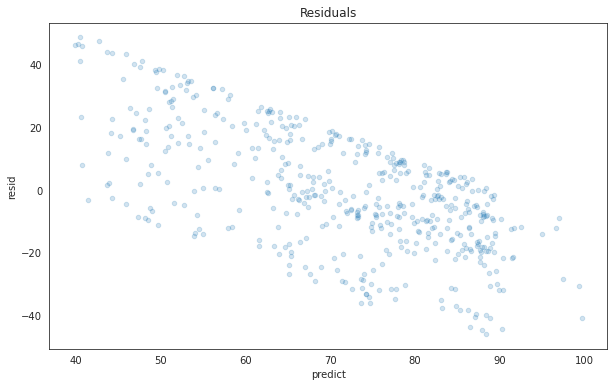

In [1920]:
# lr = LinearRegression()
# fit = model.fit(X_full, Y_full)

data = pd.DataFrame()
data['predict']=model.predict(X_full)
data['resid']=Y_full-data.predict
with sns.axes_style('white'):
    plot=data.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))
'''
df = pd.DataFrame()

df['predict']=predictions
df['resid']=np.array(y_test)-predictions
plt.scatter(df['predict'], df['resid'])
'''
#plt.scatter(data['predict'], Y_full)
plt.title('Residuals')
plt.savefig('resid.png')

# Finding best Ridge and Lasso alphas

In [1834]:
modeling_set = df_logs[df_logs['Year'] != 2018]
X, y = modeling_set.drop(columns = ['Country', 'Country Code', 'Year', 'GDP per Capita (PPP)', 'Science, Tech, Innovation R&D Expenditure (%GDP)', 'SPI Year', 'Social Progress Index'], axis = 1), modeling_set['Social Progress Index']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [1835]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [1836]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_scaled, y_train)
ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [1837]:
lasso_model.alpha_

0.05291978735958442

In [1839]:
lasso_model.coef_

array([ 0.        , -2.3504392 , -0.83774779,  0.        ,  0.10167885,
        0.61066289, -2.48602753, -0.11602083,  0.13453501,  0.29401139,
       12.37589405,  2.50983886])

In [1841]:
X.columns.tolist()

['Budget Surplus or Deficit (%GDP)',
 'Gross Savings %GDP',
 'Inflation Rate on Consumer Prices (Annual %)',
 'Tax Revenue %GDP',
 'Health Expenditure (%GDP)',
 'Education Expenditure (%GDP)',
 'Military Expenditure %GDP',
 'Fossil Fuel (%)',
 'Hydroelectric Plants (%)',
 'Renewable Energy Sources (%)',
 'log_GDP',
 'log_RD']

In [1842]:
ridge_model.alpha_

2.354286414322418

In [1843]:
ridge_model.coef_

array([ 2.43121954e-02, -2.36560813e+00, -8.83089548e-01,  2.91816292e-03,
        2.08107756e-01,  5.94605615e-01, -2.51185787e+00,  1.84779739e-01,
        4.72404687e-01,  4.64708194e-01,  1.22611752e+01,  2.59526970e+00])

In [1422]:
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train_poly_scaled, y_train)

/Users/emilyng/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.305139656699339, tolerance: 5.813158504748201
  model = cd_fast.enet_coordinate_descent_gram(


RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [1423]:
lasso_model.alpha_

0.024094035602395245

In [1758]:
ridge_model.alpha_

2.354286414322418

In [1759]:
df_logs = df.copy()
df_logs.shape

(522, 17)

In [1760]:
#df_logs['log_GDP'] = np.log(df_logs['GDP per Capita (PPP)'])
df_logs['log_RD'] = np.log(df_logs['Science, Tech, Innovation R&D Expenditure (%GDP)'])

In [1761]:
test_holdout = df_logs[df_logs['Year'] == 2018]
X_test, y_test = test_holdout.drop(columns = ['Country', 'Country Code', 'Year', 'GDP per Capita (PPP)', 'Science, Tech, Innovation R&D Expenditure (%GDP)', 'SPI Year', 'Social Progress Index'], axis = 1), df_logs['Social Progress Index']

In [1762]:
modeling_set = df_logs[df_logs['Year'] != 2018]
X, y = modeling_set.drop(columns = ['Country', 'Country Code', 'Year', 'GDP per Capita (PPP)', 'Science, Tech, Innovation R&D Expenditure (%GDP)', 'SPI Year', 'Social Progress Index'], axis = 1), modeling_set['Social Progress Index']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [1763]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [1764]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}'+ '\n')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}'+ '\n')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}'+ '\n')

Linear Regression train R^2: 0.659
Linear Regression val R^2: 0.651

Ridge Regression train R^2: 0.659
Ridge Regression val R^2: 0.650

Degree 2 polynomial regression train R^2: 0.848
Degree 2 polynomial regression val R^2: 0.577



In [1765]:
lm.coef_.tolist()

[0.14268299874663426,
 0.06913189974420042,
 -0.12515938594248244,
 0.052789775747370246,
 0.3506538027168311,
 -0.5743043605461273,
 -1.1810943140538432,
 0.010730580017773106,
 -0.025166149366230253,
 0.21382963004713587,
 5.734088563640407]

In [1766]:
X_train.columns.tolist()

['Budget Surplus or Deficit (%GDP)',
 'Gross Savings %GDP',
 'Inflation Rate on Consumer Prices (Annual %)',
 'Tax Revenue %GDP',
 'Health Expenditure (%GDP)',
 'Education Expenditure (%GDP)',
 'Military Expenditure %GDP',
 'Fossil Fuel (%)',
 'Hydroelectric Plants (%)',
 'Renewable Energy Sources (%)',
 'log_RD']

In [1852]:
lasso_model = Lasso(alpha=0.8)
model = lasso_model.fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train)
model.score(X_val_scaled, y_val)

0.9193434926264274